In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:

# Load the dataset
file_path = 'spam_ham_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [8]:
# Split the data into features and labels
X = df['text']
y = df['label_num']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Convert the text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM model using the training set
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [10]:
# Predict using the test set
y_pred = svm_model.predict(X_test_tfidf)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9893719806763285
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



<Figure size 1000x700 with 0 Axes>

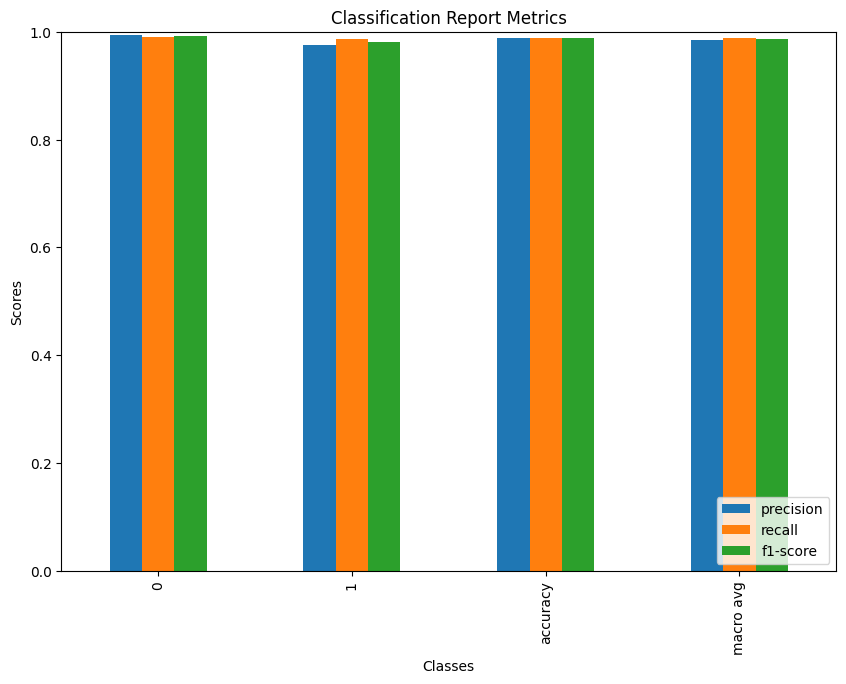

In [22]:

# Plot the classification report metrics
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and f1-score
plt.figure(figsize=(10, 7))
report_df.iloc[:-1, :-1].plot(kind='bar', figsize=(10, 7))
plt.title('Classification Report Metrics')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

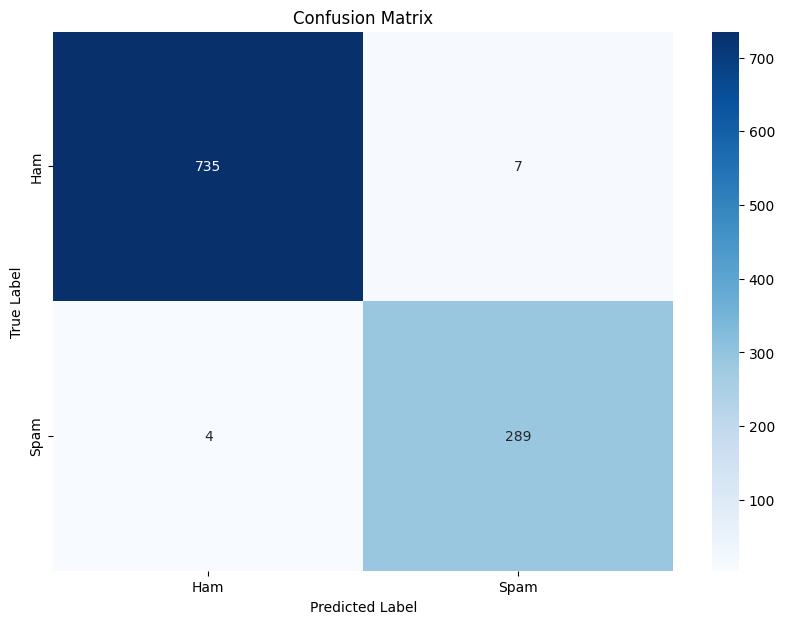

In [25]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
# Save the trained model and vectorizer for later use
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [24]:
# Define a function to preprocess and predict phishing
def predict_phishing(email_text):
    # Load the trained model and vectorizer
    svm_model = joblib.load('svm_model.pkl')
    tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
    
    # Preprocess the input text
    email_tfidf = tfidf_vectorizer.transform([email_text])
    
    # Predict using the trained model
    prediction = svm_model.predict(email_tfidf)
    
    # Return the prediction result
    return 'phishing' if prediction == 1 else 'not phishing'

# Example usage
email_text = "Subject: Your account has been compromised! Please update your password immediately."
prediction = predict_phishing(email_text)
print(f"The email is predicted to be: {prediction}")

The email is predicted to be: phishing
